Import the libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

Data load

In [14]:
deliveries_df=pd.read_csv('/content/deliveries.csv')
matches_df=pd.read_csv('/content/matches.csv')

Exploratory Data analysis

In [15]:
#information about the datasets
deliveries_df.info()
print('----------------------------------------')
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172943 entries, 0 to 172942
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          172943 non-null  int64  
 1   inning            172943 non-null  int64  
 2   batting_team      172943 non-null  object 
 3   bowling_team      172943 non-null  object 
 4   over              172942 non-null  float64
 5   ball              172942 non-null  float64
 6   batter            172942 non-null  object 
 7   bowler            172942 non-null  object 
 8   non_striker       172942 non-null  object 
 9   batsman_runs      172942 non-null  float64
 10  extra_runs        172942 non-null  float64
 11  total_runs        172942 non-null  float64
 12  extras_type       9264 non-null    object 
 13  is_wicket         172942 non-null  float64
 14  player_dismissed  8544 non-null    object 
 15  dismissal_kind    8544 non-null    object 
 16  fielder           61

In [16]:
#shape of the datasets
print('delivery dataset shape',deliveries_df.shape)
print('matches dataset shape',matches_df.shape)

delivery dataset shape (172943, 17)
matches dataset shape (1095, 20)


In [17]:
#statistics about the datasets describe() function
deliveries_df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,1.729430e+05,172943.000000,172942.000000,172942.000000,172942.000000,172942.000000,172942.000000,172942.000000
mean,7.031604e+05,1.482720,9.159094,3.616305,1.234662,0.067398,1.302061,0.049404
std,2.789994e+05,0.501793,5.676769,1.807487,1.606540,0.343388,1.594647,0.216710
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012050e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,5.980390e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,9.809610e+05,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.178409e+06,4.000000,19.000000,10.000000,6.000000,7.000000,7.000000,1.000000


In [18]:
#first five columns of the delivery dataset
deliveries_df.head(5)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [19]:
#first five columns of the matches dataset
matches_df.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


Data Cleaning

In [20]:
#Checking for missing values
print(deliveries_df.isnull().sum())
print('----------------------------------------')
print(matches_df.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     1
ball                     1
batter                   1
bowler                   1
non_striker              1
batsman_runs             1
extra_runs               1
total_runs               1
extras_type         163679
is_wicket                1
player_dismissed    164399
dismissal_kind      164399
fielder             166833
dtype: int64
----------------------------------------
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: 

Feature Engineering

(Merge the datasets and create features that might help in predicting score)

In [21]:
#Merge matches and deliveries data on match_id
data=pd.merge(deliveries_df,matches_df,left_on='match_id',right_on='id')


In [22]:
#Extract relevant features
data['total_runs']=data['total_runs'].astype(float)
data['total_runs']=data['total_runs'].fillna(0)
# Handle the season column, extracting the year part if necessary
data['season'] = data['season'].str.split('/').str[0].astype(int) # Extract the year portion and convert to integer
data['date']=pd.to_datetime(data['date'])


In [23]:
#aggregate runs by match_id and inning
runs_by_match_inning=data.groupby(['match_id','inning'])['total_runs'].sum().reset_index() # Add parentheses here
runs_by_match_inning.rename(columns={'total_runs':'total_runs_in_inning'},inplace=True)

In [24]:
#merge with main data
data=pd.merge(data,runs_by_match_inning,on=['match_id','inning'],how='left')


In [25]:
#Feature Engineering
# Check if 'over' and 'ball' columns exist, and calculate 'overball' if needed
if 'over' in data.columns and 'ball' in data.columns:
    data['overball'] = data['over'] * 6 + data['ball']



In [26]:
#Feature Engineering
data['runs_per_over']=data['total_runs_in_inning']/(data['overball']// 6+1)


Model Training

1.machine learning models
(you can use regression models to predict the scores)

In [27]:
#Using Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [28]:
#Define Features and target variable
X=data[['season','runs_per_over','target_runs','inning']]
y=data['total_runs_in_inning']

In [29]:
#Print shape of X and y before splitting
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Head of X:\n",X.head()) # Print the first few rows of X
print("Head of y:\n",y.head()) # Print the first few rows of y

#Split Data
X_train,X_test,y_train,y_test=train_test_split(X,y)

Shape of X: (172943, 4)
Shape of y: (172943,)
Head of X:
    season  runs_per_over  target_runs  inning
0    2007          222.0        223.0       1
1    2007          222.0        223.0       1
2    2007          222.0        223.0       1
3    2007          222.0        223.0       1
4    2007          222.0        223.0       1
Head of y:
 0    222.0
1    222.0
2    222.0
3    222.0
4    222.0
Name: total_runs_in_inning, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split

# Check the number of samples
num_samples = X.shape[0]

# Handle small datasets with a conditional split
if num_samples > 1:
    # Adjust test_size if necessary
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=2
    )
else:
    print("Insufficient samples for splitting. Number of samples:", num_samples)
    X_train, y_train = X, y
    X_test, y_test = None, None

print("Shape of X_train:", X_train.shape if X_train is not None else None)
print("Shape of X_test:", X_test.shape if X_test is not None else None)
print("Shape of y_train:", y_train.shape if y_train is not None else None)
print("Shape of y_test:", y_test.shape if y_test is not None else None)


Shape of X_train: (138354, 4)
Shape of X_test: (34589, 4)
Shape of y_train: (138354,)
Shape of y_test: (34589,)


In [31]:
# Handle missing values before fitting the model
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use the same imputation strategy for the test set

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Now fit the model with imputed data

RandomForestRegressor(random_state=42)

In [32]:
# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred))

Random Forest MSE: 1.1883816466535055


2.Deep Learning model



In [33]:
#model building
def build_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [34]:
# Build and compile the model
input_dim = X_train.shape[1]
nn_model = build_nn_model(input_dim)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model training

In [35]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6096.4287 - val_loss: 5128.6118
Epoch 2/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 553.6326 - val_loss: 5933.7773
Epoch 3/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 444.0618 - val_loss: 6320.3794
Epoch 4/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 398.5566 - val_loss: 4327.1543
Epoch 5/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 374.7963 - val_loss: 5375.1777
Epoch 6/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 357.6895 - val_loss: 5987.9893
Epoch 7/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 345.1109 - val_loss: 6399.8174
Epoch 8/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 346.7824 - val_loss: 5406.3281
Epoch 9/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 338.6754 - val_loss: 5490.8569
Epoch 10/10
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 330.9618 - val_loss: 5997.1455


In [36]:

# Make predictions
y_pred_nn = nn_model.predict(X_test)

1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


Model Evalution

In [37]:
# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error of Neural Network Model: {mse_nn:.2f}")

Mean Squared Error of Neural Network Model: 5980.37


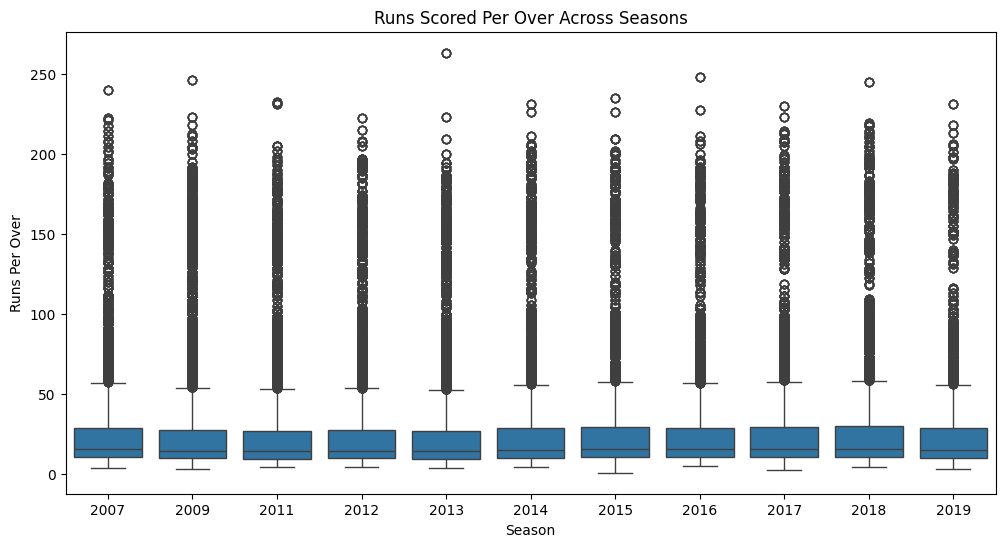

In [38]:
# prompt: visulaize the data

# Visualize runs scored per over for different seasons
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='runs_per_over', data=data)
plt.title('Runs Scored Per Over Across Seasons')
plt.xlabel('Season')
plt.ylabel('Runs Per Over')
plt.show()



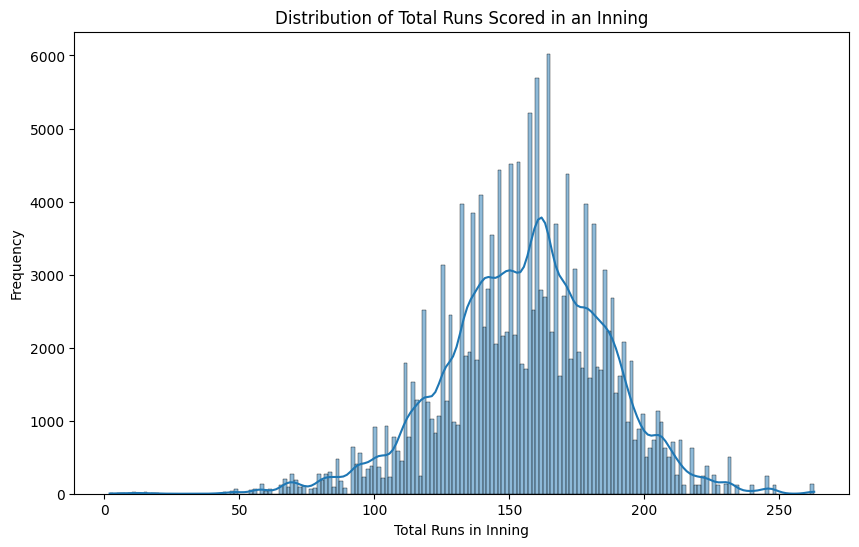

In [39]:
# Visualize distribution of total runs scored in an inning
plt.figure(figsize=(10, 6))
sns.histplot(data['total_runs_in_inning'], kde=True)
plt.title('Distribution of Total Runs Scored in an Inning')
plt.xlabel('Total Runs in Inning')
plt.ylabel('Frequency')
plt.show()




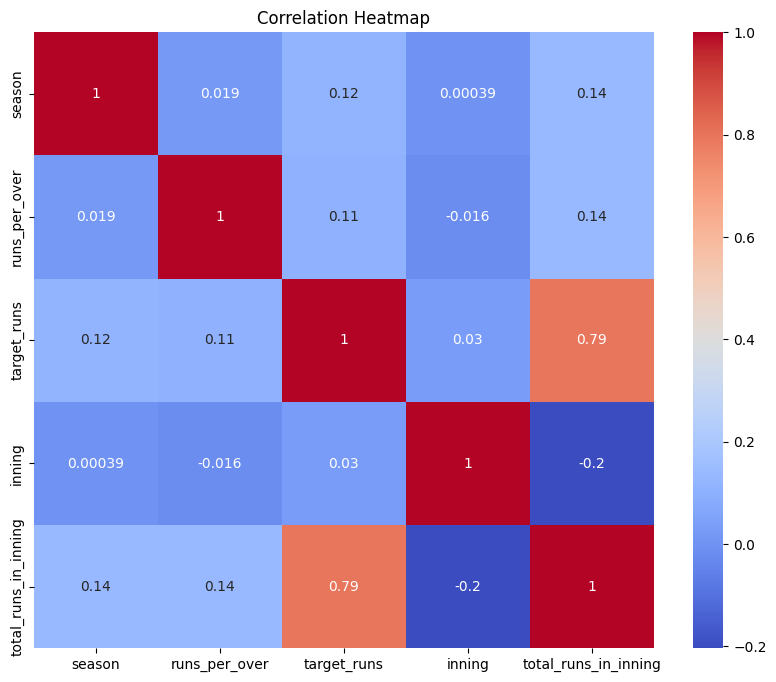

In [40]:
# Visualize correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data[['season', 'runs_per_over', 'target_runs', 'inning', 'total_runs_in_inning']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()